<a href="https://colab.research.google.com/github/CHENNURUHARISH/23024881-CLUSTERING-FITTING/blob/main/PLANT_DISEASEEXPERMENT_(2)_ACHEIEVE(2)_BEST_AS_OF_NOW%202.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [80]:
!nvidia-smi

Thu Mar 27 10:13:16 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   78C    P0             36W /   70W |    3704MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [215]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os

In [216]:

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


















# Data Preprocessing
# Train image Processing

In [3]:

### Data Augmentation & Normalization
from tensorflow.keras.layers import RandomFlip, RandomRotation, RandomZoom, Rescaling

data_augmentation = tf.keras.Sequential([
    RandomFlip("horizontal"),  # Flip images randomly
    RandomRotation(0.2),       # Rotate images randomlya
    RandomZoom(0.2),

])

normalization_layer = Rescaling(1./255)  # Normalize pixels to range [0,1]

# # Apply Data Augmentation & Normalization
# train_dataset = train_dataset.map(lambda x, y: (data_augmentation(normalization_layer(x)), y))
# valid_dataset = valid_dataset.map(lambda x, y: (normalization_layer(x), y))

In [20]:
from pickle import FALSE

# Load training dataset from directory (variable name: train_ds)
train_dataset = tf.keras.utils.image_dataset_from_directory(
    "/content/drive/MyDrive/train",  # Direct path to training images
    labels="inferred",
    label_mode="categorical",
    batch_size=32,
    image_size=(128,128),
    shuffle=True,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)


# Load validation dataset from directory (variable name: valid_ds)
valid_dataset = tf.keras.utils.image_dataset_from_directory(
    "/content/drive/MyDrive/val",  # Direct path to validation images
    labels="inferred",
    label_mode="categorical",
    batch_size=32,
    image_size=(128,128),
    shuffle=FALSE,  # No shuffling for validation set
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)


# Print class names for both training and validation sets
print("Training Set Classes:", train_dataset.class_names)
#print("Validation Set Classes:", valid_ds.class_names)

# Apply data augmentation & normalization
train_dataset = train_dataset.map(lambda x, y: (data_augmentation(normalization_layer(x)), y))
valid_dataset = valid_dataset.map(lambda x, y: (normalization_layer(x), y))



Found 3815 files belonging to 37 classes.
Found 3770 files belonging to 37 classes.
Training Set Classes: ['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Sept

In [21]:

train_dataset

<_MapDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 37), dtype=tf.float32, name=None))>

In [22]:

for x,y in train_dataset:
  print(x, x.shape)
  print(y, y.shape)
  break

tf.Tensor(
[[[[0.5309548  0.4878176  0.51919013]
   [0.47714496 0.43400776 0.4653803 ]
   [0.49886727 0.45573002 0.4871025 ]
   ...
   [0.2432684  0.2785625  0.15968314]
   [0.20078506 0.23607919 0.12224285]
   [0.14972827 0.1850224  0.0733237 ]]

  [[0.53209543 0.48895818 0.5203307 ]
   [0.49890792 0.45577073 0.48714328]
   [0.5135531  0.47041577 0.50178826]
   ...
   [0.16942154 0.20471564 0.08920745]
   [0.17725183 0.21254598 0.09947041]
   [0.13592301 0.17121714 0.06369766]]

  [[0.4956657  0.45252845 0.483901  ]
   [0.4921584  0.4490212  0.48039374]
   [0.5249747  0.4818375  0.51321006]
   ...
   [0.18179737 0.2170915  0.10334682]
   [0.20957303 0.24486715 0.13304277]
   [0.14431171 0.17960583 0.07400385]]

  ...

  [[0.1300413  0.09088564 0.0830825 ]
   [0.12293204 0.08379338 0.07600158]
   [0.12078038 0.08156957 0.07372971]
   ...
   [0.5926379  0.55734897 0.568831  ]
   [0.54788995 0.5125923  0.5258466 ]
   [0.5367068  0.50137156 0.5172163 ]]

  [[0.15446149 0.11610406 0.108833

In [23]:

cnn = tf.keras.models.Sequential()

# MODEL

In [24]:
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout
from tensorflow.keras.models import Sequential

In [25]:



cnn= Sequential()

In [26]:


cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))


In [27]:




cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))


In [28]:


cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))


In [29]:




cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))


In [30]:


cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))




In [31]:

cnn.add(tf.keras.layers.Dropout(0.25))

In [32]:

cnn.add(tf.keras.layers.Flatten())


In [33]:

cnn.add(tf.keras.layers.Dense(units=1400,activation='relu'))


In [34]:



cnn.add(tf.keras.layers.Dropout(0.4)) #To avoid overfitting

In [35]:


#Output Layer
cnn.add(tf.keras.layers.Dense(units=37,activation='softmax'))


## **Compiling and Training Phase**


In [36]:



cnn.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0005),loss='categorical_crossentropy',metrics=['accuracy'])

In [37]:



cnn.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_30 (Conv2D)                   │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_31 (Conv2D)                   │ (None, 126, 126, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_15 (MaxPooling2D)      │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_32 (Conv2D)                   │ (None, 63, 63, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_33 (Conv2D)                   │ (None, 61, 61, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_16 (MaxPooling2D)      │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_34 (Conv2D)                   │ (None, 30, 30, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_35 (Conv2D)                   │ (None, 28, 28, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_17 (MaxPooling2D)      │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_36 (Conv2D)                   │ (None, 14, 14, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_37 (Conv2D)                   │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_18 (MaxPooling2D)      │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_38 (Conv2D)                   │ (None, 6, 6, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_39 (Conv2D)                   │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_19 (MaxPooling2D)      │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 1400)                │       2,868,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_14 (Dropout)                 │ (None, 1400)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 37)                  │          51,837 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,632,661 (29.12 MB)

 Trainable params: 7,632,661 (29.12 MB)

 Non-trainable params: 0 (0.00 B)

**MODEL** **TRAINING**

In [38]:


training_history = cnn.fit(train_dataset, validation_data=valid_dataset, epochs=30)

Epoch 1/30
120/120 ━━━━━━━━━━━━━━━━━━━━ 34s 221ms/step - accuracy: 0.0271 - loss: 3.6121 - val_accuracy: 0.0268 - val_loss: 3.5518
Epoch 2/30
120/120 ━━━━━━━━━━━━━━━━━━━━ 21s 176ms/step - accuracy: 0.0446 - loss: 3.4988 - val_accuracy: 0.0621 - val_loss: 3.4271
Epoch 3/30
120/120 ━━━━━━━━━━━━━━━━━━━━ 22s 182ms/step - accuracy: 0.0741 - loss: 3.3128 - val_accuracy: 0.1000 - val_loss: 3.2930
Epoch 4/30
120/120 ━━━━━━━━━━━━━━━━━━━━ 21s 174ms/step - accuracy: 0.1148 - loss: 3.1370 - val_accuracy: 0.1719 - val_loss: 2.9842
Epoch 5/30
120/120 ━━━━━━━━━━━━━━━━━━━━ 21s 175ms/step - accuracy: 0.1964 - loss: 2.7003 - val_accuracy: 0.2302 - val_loss: 2.6055
Epoch 6/30
120/120 ━━━━━━━━━━━━━━━━━━━━ 22s 181ms/step - accuracy: 0.2467 - loss: 2.3978 - val_accuracy: 0.2992 - val_loss: 2.3080
Epoch 7/30
120/120 ━━━━━━━━━━━━━━━━━━━━ 21s 174ms/step - accuracy: 0.3037 - loss: 2.2153 - val_accuracy: 0.3915 - val_loss: 2.0591
Epoch 8/30
120/120 ━━━━━━━━━━━━━━━━━━━━ 21s 176ms/step - accuracy: 0.3592 - loss: 2

In [39]:



 #Training set Accuracy
train_loss, train_acc = cnn.evaluate(train_dataset)
print('Training accuracy:', train_acc)


120/120 ━━━━━━━━━━━━━━━━━━━━ 16s 132ms/step - accuracy: 0.8418 - loss: 0.4618
Training accuracy: 0.8382700085639954


In [40]:
#Validation set Accuracy
val_loss, val_acc = cnn.evaluate(valid_dataset)
print('Validation accuracy:', val_acc)

118/118 ━━━━━━━━━━━━━━━━━━━━ 6s 47ms/step - accuracy: 0.7516 - loss: 0.9623
Validation accuracy: 0.7742705345153809


## **SAVING MODEL**

In [41]:
cnn.save('trained_plant_disease_model.keras')
training_history.history #Return Dictionary of history

{'accuracy': [0.027522936463356018,
  0.04980340600013733,
  0.08597640693187714,
  0.12712974846363068,
  0.21048492193222046,
  0.260026216506958,
  0.31716907024383545,
  0.3740498125553131,
  0.4104849398136139,
  0.437221497297287,
  0.5030144453048706,
  0.5237221717834473,
  0.5619921088218689,
  0.5811271071434021,
  0.6123197674751282,
  0.6319790482521057,
  0.6681520342826843,
  0.677850604057312,
  0.6972476840019226,
  0.7069462537765503,
  0.7226736545562744,
  0.7323722243309021,
  0.7543905377388,
  0.7465268969535828,
  0.7701179385185242,
  0.7847968339920044,
  0.7837483882904053,
  0.795543909072876,
  0.8086500763893127,
  0.8251638412475586],
 'loss': [3.605560302734375,
  3.4483606815338135,
  3.2612593173980713,
  3.0365352630615234,
  2.6168370246887207,
  2.33310866355896,
  2.1621761322021484,
  2.016392230987549,
  1.8668382167816162,
  1.762191891670227,
  1.5710036754608154,
  1.4923087358474731,
  1.3437548875808716,
  1.317514181137085,
  1.1829297542572

In [42]:
print(training_history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


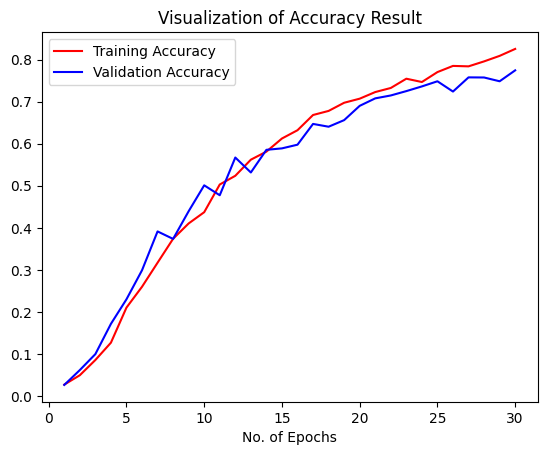

In [43]:
# epochs = range(1, len(training_history.history['accuracy']) + 1)
epochs = [i for i in range(1,31)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

### OTHER METRICS FOR EVALUATION


In [44]:

test_set = tf.keras.utils.image_dataset_from_directory(
    "/content/drive/MyDrive/val",  # Direct path to validation images
    labels="inferred",
    label_mode="categorical",
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

# Correct way to get class names
class_names = test_set.class_names
print(class_names)  # Check the class names


Found 3770 files belonging to 37 classes.
['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite'

In [45]:
y_pred = cnn.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)
predicted_categories

3770/3770 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step


<tf.Tensor: shape=(3770,), dtype=int64, numpy=array([1, 1, 1, ..., 1, 1, 1])>

In [46]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)
Y_true

<tf.Tensor: shape=(3770,), dtype=int64, numpy=array([ 0,  0,  0, ..., 36, 36, 36])>

In [47]:

from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)
# Precision Recall Fscore
print(classification_report(Y_true,predicted_categories,target_names=class_names))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.00      0.00      0.00       126
                                 Apple___Black_rot       0.05      0.99      0.09       125
                          Apple___Cedar_apple_rust       0.00      0.00      0.00        55
                                   Apple___healthy       0.00      0.00      0.00       109
                               Blueberry___healthy       0.00      0.00      0.00       100
          Cherry_(including_sour)___Powdery_mildew       0.00      0.00      0.00       100
                 Cherry_(including_sour)___healthy       0.00      0.00      0.00       102
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.00      0.00      0.00       103
                       Corn_(maize)___Common_rust_       0.00      0.00      0.00       109
               Corn_(maize)___Northern_Leaf_Blight       0.50      0.02      0.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


CONFUSION MATRIX


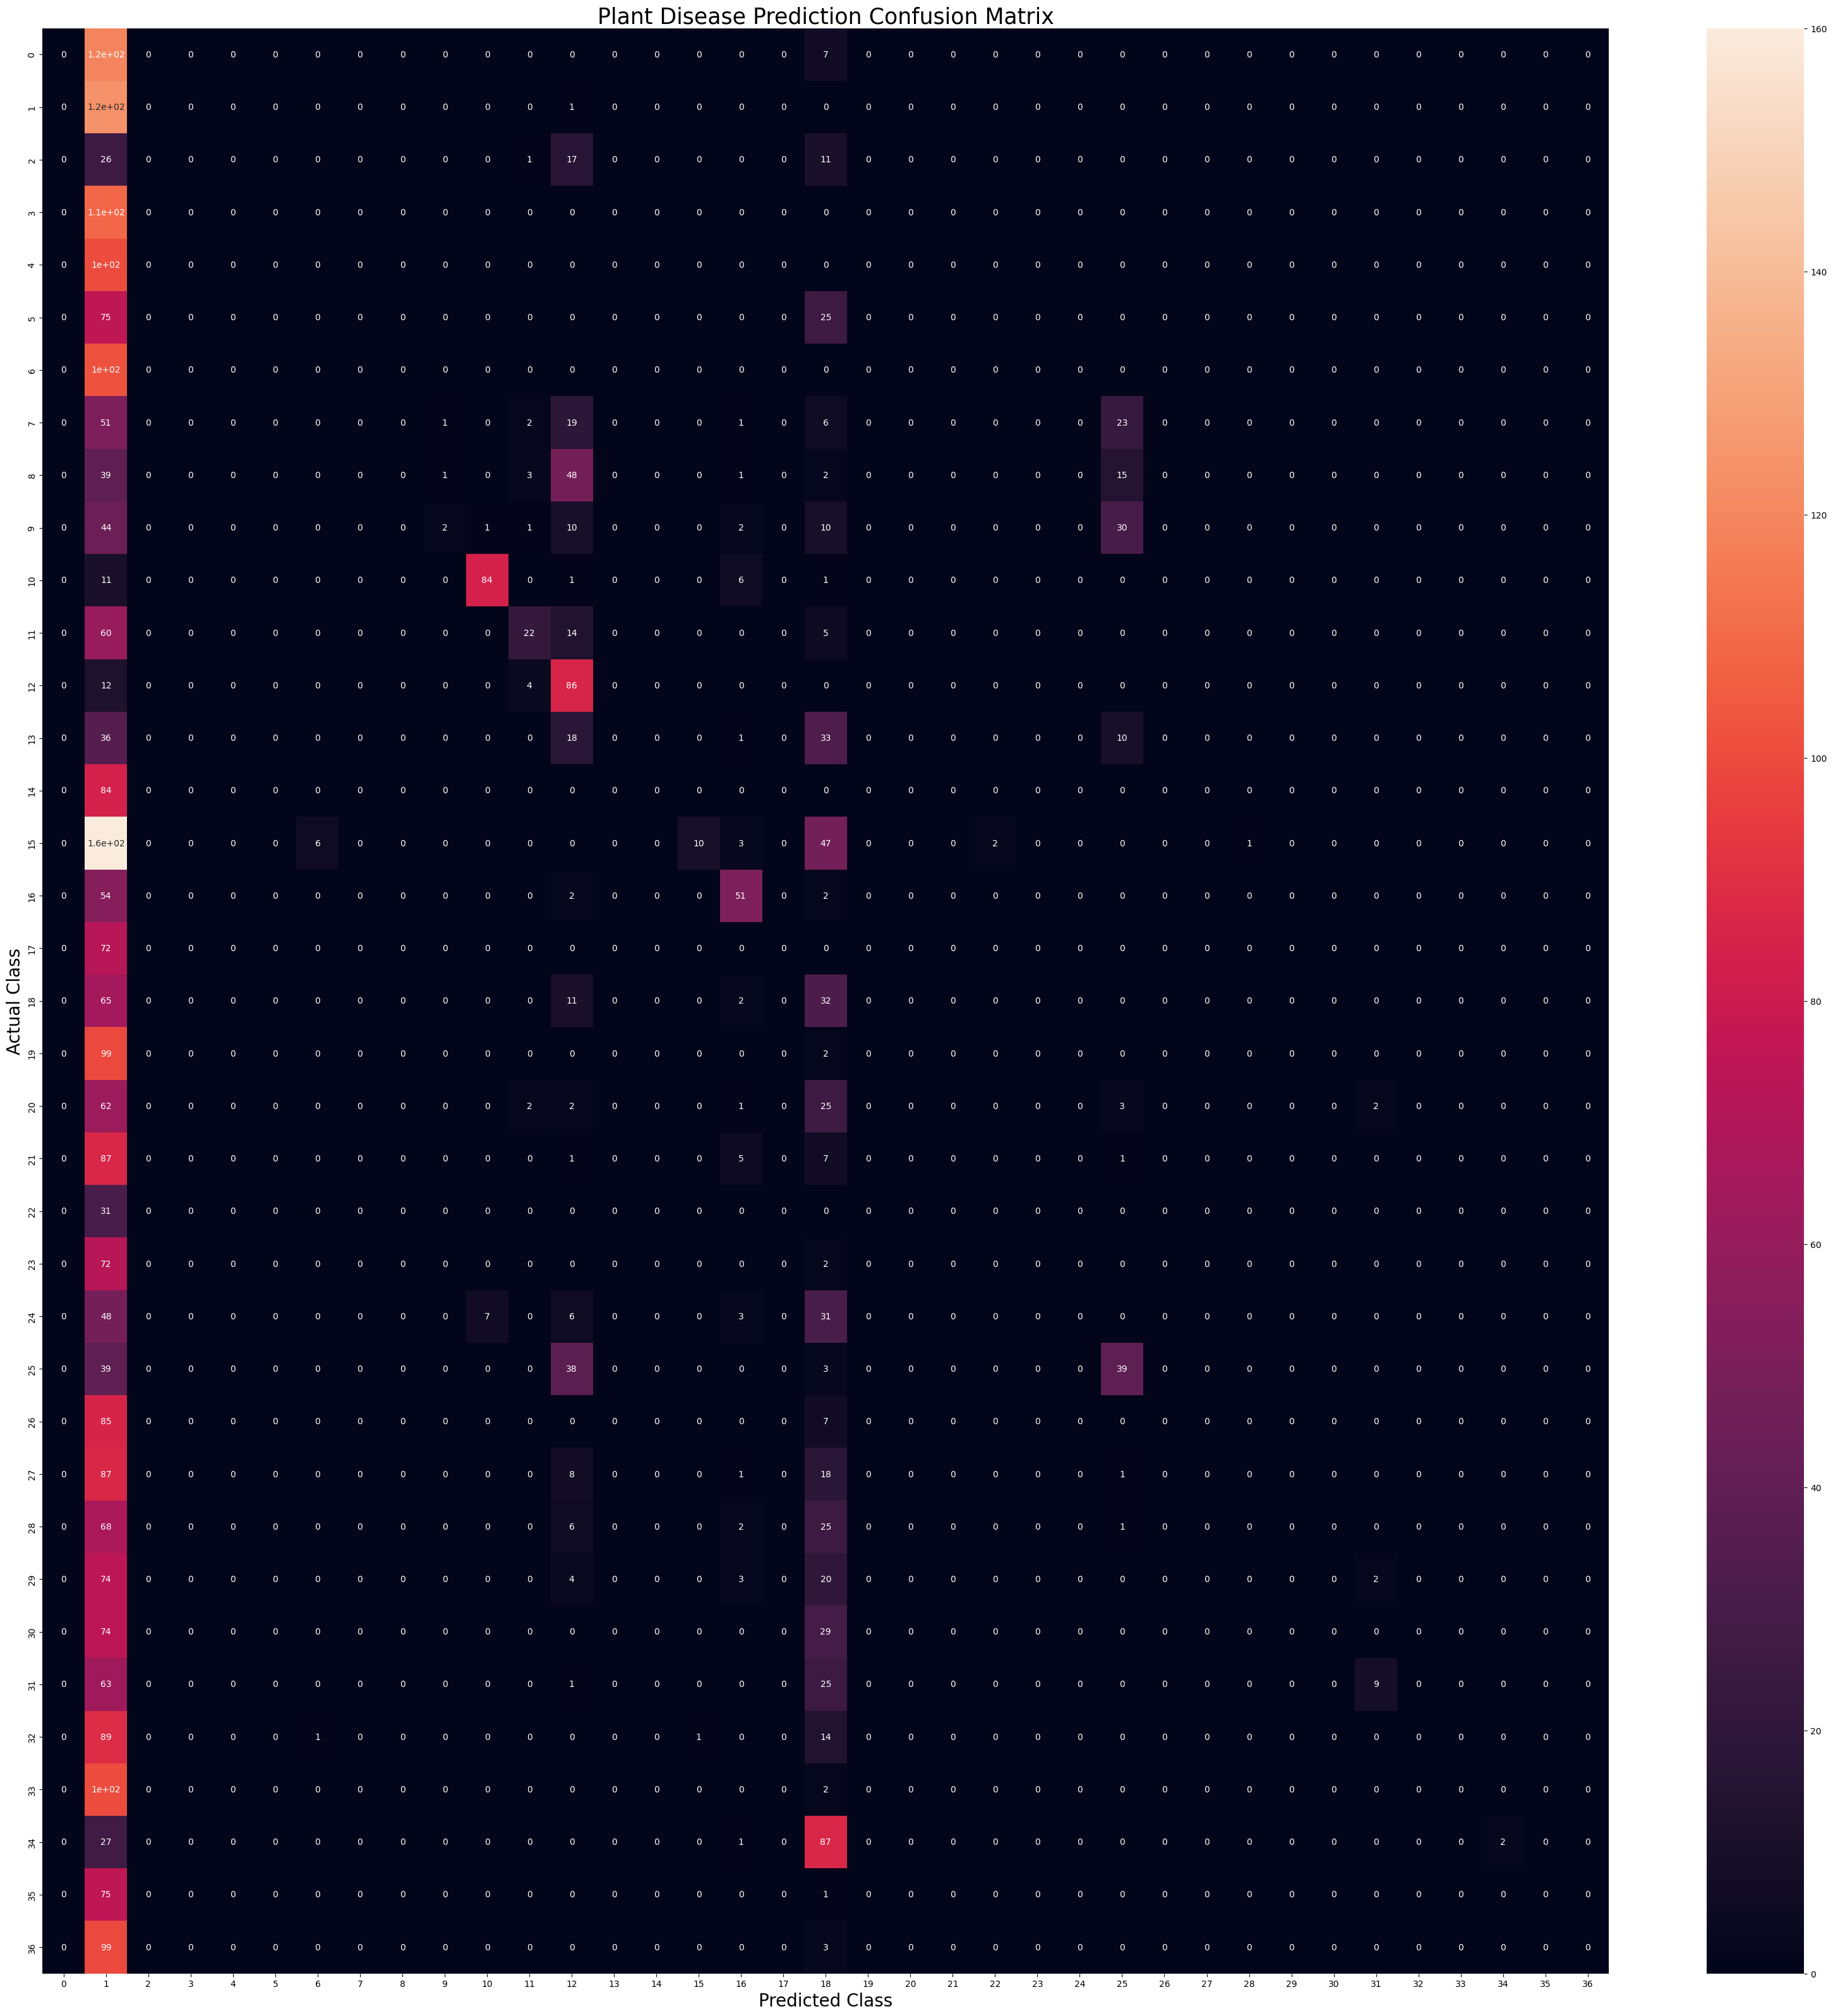

In [48]:
plt.figure(figsize=(40, 40))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 25)
plt.show()

In [49]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [50]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    "/content/drive/MyDrive/val",
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

# Access class names correctly
class_names = validation_set.class_names
print(class_names)


Found 3770 files belonging to 37 classes.
['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite'

In [51]:
cnn = tf.keras.models.load_model('trained_plant_disease_model.keras')

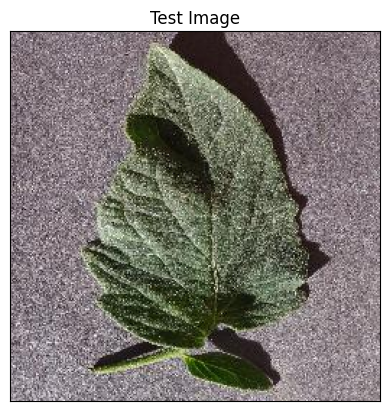

In [52]:
import cv2
import matplotlib.pyplot as plt

# Correcting the file path by enclosing it in quotes
image_path = "/content/drive/MyDrive/val/Tomato___healthy/01f98912-9627-4ce0-8f0f-e451b7acbb6c___RS_HL 0509.JPG"
# Reading an image in default mode
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Converting BGR to RGB

# Displaying the image
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])  # Hides the x-axis ticks
plt.yticks([])  # Hides the y-axis ticks
plt.show()


### **TEXT MODEL**

In [53]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(128,128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = cnn.predict(input_arr)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 655ms/step


In [54]:
print(predictions)

[[0.0000000e+00 9.9994504e-01 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 5.4952277e-05 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00]]


In [55]:
result_index = np.argmax(predictions) #Return index of max element
print(result_index)

1


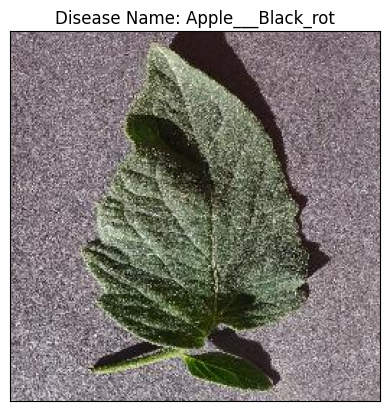

In [56]:
# Displaying the disease prediction
model_prediction = class_names[result_index]
plt.imshow(img)
plt.title(f"Disease Name: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()

Found 3815 files belonging to 37 classes.
Found 3770 files belonging to 37 classes.
Training Set Classes: ['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Sept

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/45
120/120 ━━━━━━━━━━━━━━━━━━━━ 40s 241ms/step - accuracy: 0.1719 - loss: 3.2901 - val_accuracy: 0.1605 - val_loss: 4.6950
Epoch 2/45
120/120 ━━━━━━━━━━━━━━━━━━━━ 21s 176ms/step - accuracy: 0.3592 - loss: 2.2860 - val_accuracy: 0.3727 - val_loss: 2.3201
Epoch 3/45
120/120 ━━━━━━━━━━━━━━━━━━━━ 20s 168ms/step - accuracy: 0.5010 - loss: 1.7029 - val_accuracy: 0.4451 - val_loss: 1.9712
Epoch 4/45
120/120 ━━━━━━━━━━━━━━━━━━━━ 20s 169ms/step - accuracy: 0.5767 - loss: 1.4324 - val_accuracy: 0.5615 - val_loss: 1.5572
Epoch 5/45
120/120 ━━━━━━━━━━━━━━━━━━━━ 21s 171ms/step - accuracy: 0.6450 - loss: 1.1526 - val_accuracy: 0.3928 - val_loss: 2.7145
Epoch 6/45
120/120 ━━━━━━━━━━━━━━━━━━━━ 21s 170ms/step - accuracy: 0.6766 - loss: 1.0290 - val_accuracy: 0.5610 - val_loss: 1.6178
Epoch 7/45
120/120 ━━━━━━━━━━━━━━━━━━━━ 20s 168ms/step - accuracy: 0.7358 - loss: 0.8489 - val_accuracy: 0.6716 - val_loss: 1.2147
Epoch 8/45
120/120 ━━━━━━━━━━━━━━━━━━━━ 20s 165ms/step - accuracy: 0.7459 - loss: 0

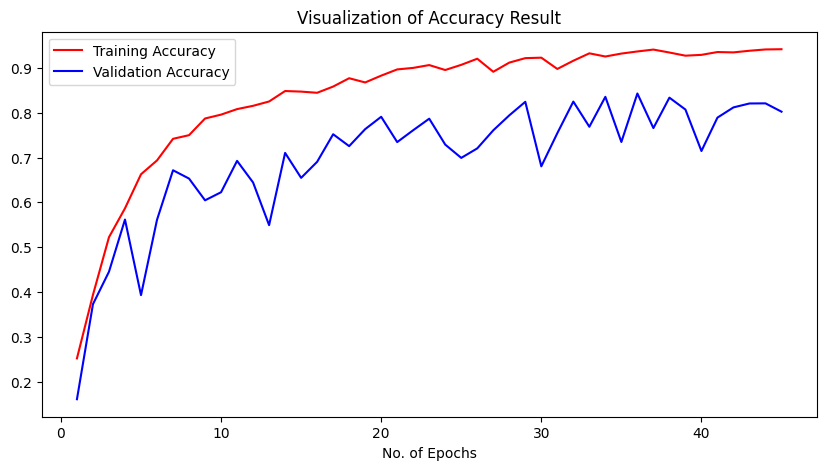

Found 3770 files belonging to 37 classes.
Test Classes: ['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotte

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.00      0.00      0.00       126
                                 Apple___Black_rot       0.11      0.97      0.20       125
                          Apple___Cedar_apple_rust       0.00      0.00      0.00        55
                                   Apple___healthy       0.00      0.00      0.00       109
                               Blueberry___healthy       0.00      0.00      0.00       100
          Cherry_(including_sour)___Powdery_mildew       0.00      0.00      0.00       100
                 Cherry_(including_sour)___healthy       0.18      0.36      0.24       102
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.00      0.00      0.00       103
                       Corn_(maize)___Common_rust_       0.00      0.00      0.00       109
               Corn_(maize)___Northern_Leaf_Blight       0.00      0.00      0.

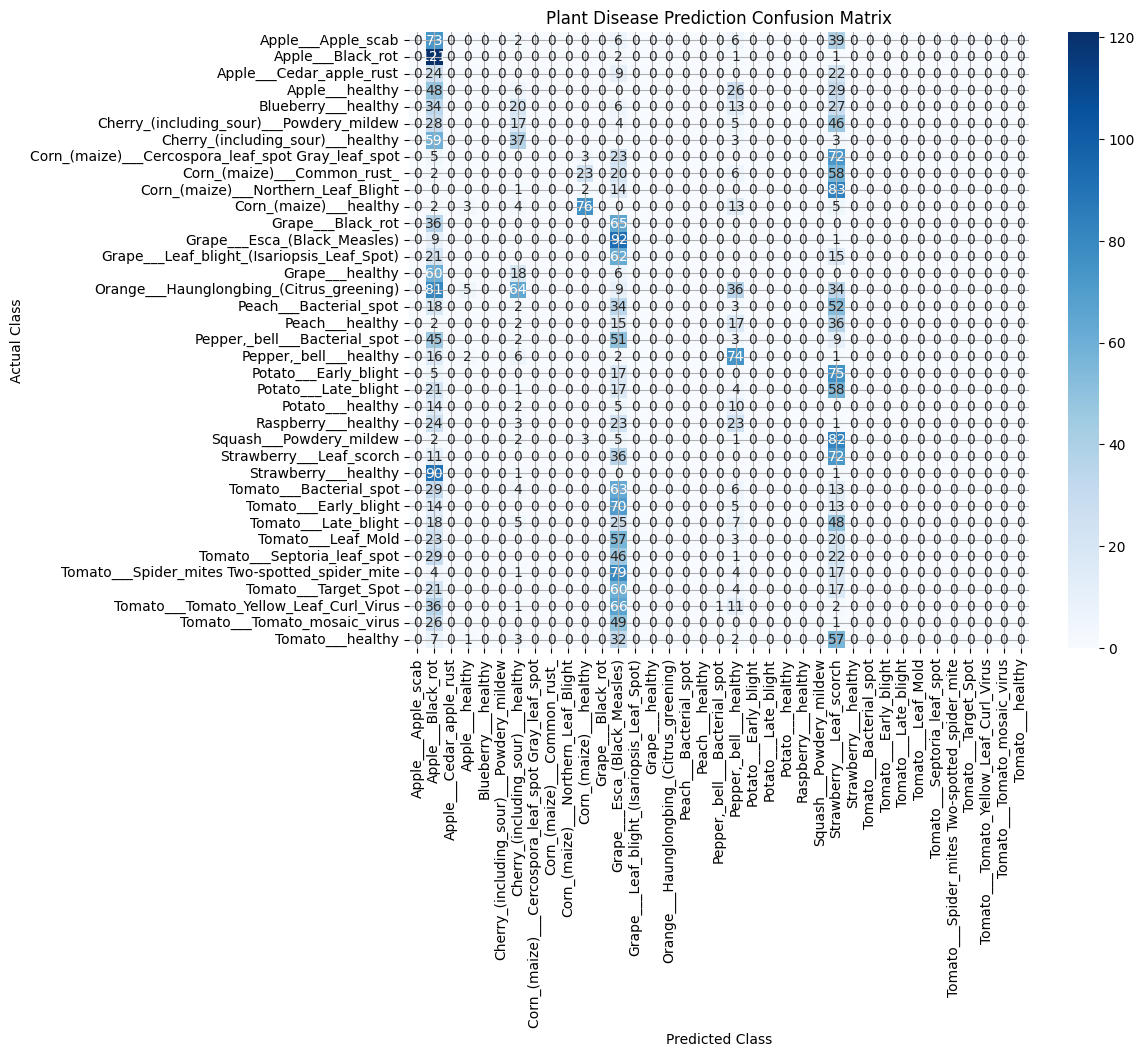

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os

# Data Augmentation & Normalization
from tensorflow.keras.layers import RandomFlip, RandomRotation, RandomZoom, Rescaling

data_augmentation = tf.keras.Sequential([
    RandomFlip("horizontal"),  # Flip images randomly
    RandomRotation(0.2),       # Rotate images randomly
    RandomZoom(0.2),           # Zoom randomly
])



normalization_layer = Rescaling(1./255)  # Normalize pixels to range [0,1]

# Load training dataset from directory
train_dataset = tf.keras.utils.image_dataset_from_directory(
    "/content/drive/MyDrive/train",
    labels="inferred",
    label_mode="categorical",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True
)

# Load validation dataset from directory
valid_dataset = tf.keras.utils.image_dataset_from_directory(
    "/content/drive/MyDrive/val",
    labels="inferred",
    label_mode="categorical",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False
)

# Print class names for both training and validation sets
print("Training Set Classes:", train_dataset.class_names)

# Apply data augmentation & normalization to the training dataset
train_dataset = train_dataset.map(lambda x, y: (data_augmentation(normalization_layer(x)), y))
valid_dataset = valid_dataset.map(lambda x, y: (normalization_layer(x), y))

# Define CNN model
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization, LeakyReLU
from tensorflow.keras.models import Sequential

cnn = Sequential()

cnn.add(Conv2D(filters=32, kernel_size=3, padding='same', kernel_initializer='he_normal', input_shape=[128, 128, 3]))
cnn.add(BatchNormalization())
cnn.add(LeakyReLU())
cnn.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(MaxPool2D(pool_size=2, strides=2))

cnn.add(Conv2D(filters=64, kernel_size=3, padding='same', kernel_initializer='he_normal'))
cnn.add(BatchNormalization())
cnn.add(LeakyReLU())
cnn.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
cnn.add(MaxPool2D(pool_size=2, strides=2))

cnn.add(Conv2D(filters=128, kernel_size=3, padding='same', kernel_initializer='he_normal'))
cnn.add(BatchNormalization())
cnn.add(LeakyReLU())
cnn.add(Conv2D(filters=128, kernel_size=3, activation='relu'))
cnn.add(MaxPool2D(pool_size=2, strides=2))

cnn.add(Conv2D(filters=256, kernel_size=3, padding='same', kernel_initializer='he_normal'))
cnn.add(BatchNormalization())
cnn.add(LeakyReLU())
cnn.add(Conv2D(filters=256, kernel_size=3, activation='relu'))
cnn.add(Dropout(0.2))
cnn.add(MaxPool2D(pool_size=2, strides=2))

cnn.add(Conv2D(filters=512, kernel_size=3, padding='same', kernel_initializer='he_normal'))
cnn.add(BatchNormalization())
cnn.add(LeakyReLU())
cnn.add(Conv2D(filters=512, kernel_size=3, activation='relu'))
cnn.add(Dropout(0.3))
cnn.add(MaxPool2D(pool_size=2, strides=2))

cnn.add(Dropout(0.25))
cnn.add(Flatten())
cnn.add(Dense(units=1200, kernel_initializer='he_normal'))
cnn.add(BatchNormalization())
cnn.add(LeakyReLU())
cnn.add(Dropout(0.4))  # To avoid overfitting

# Output Layer
cnn.add(Dense(units=37, activation='softmax'))  # Adjust for number of classes in your dataset

# Compile the model
cnn.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
            loss='categorical_crossentropy',
            metrics=['accuracy'])

# Train the model
training_history = cnn.fit(train_dataset, validation_data=valid_dataset, epochs=45)

# Evaluate the model on training set
train_loss, train_acc = cnn.evaluate(train_dataset)
print('Training accuracy:', train_acc)

# Evaluate the model on validation set
val_loss, val_acc = cnn.evaluate(valid_dataset)
print('Validation accuracy:', val_acc)


# Save the trained model
cnn.save('trained_plant_disease_model.keras')

# Plot accuracy results
epochs = range(1, len(training_history.history['accuracy']) + 1)
plt.figure(figsize=(10, 5))
plt.plot(epochs, training_history.history['accuracy'], color='red', label='Training Accuracy')
plt.plot(epochs, training_history.history['val_accuracy'], color='blue', label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

# Load test dataset
test_set = tf.keras.utils.image_dataset_from_directory(
    "/content/drive/MyDrive/val",  # Adjust this path if necessary
    labels="inferred",
    label_mode="categorical",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False
)

# Get class names
class_names = test_set.class_names
print("Test Classes:", class_names)

# Make predictions
y_pred = cnn.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

# Get true labels
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

# Evaluate model using a confusion matrix
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(Y_true, predicted_categories)
print(classification_report(Y_true, predicted_categories, target_names=class_names))

# Plot confusion matrix
# plt.figure(figsize=(10, 8))
# sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
# plt.xlabel('Predicted Class')
# plt.ylabel('Actual Class')
# plt.title('Plant Disease Prediction Confusion Matrix')
# plt.grid(True)
# plt.show()

plt.figure(figsize=(40, 40))

sns.heatmap(cm,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 25)
plt.grid(True)
plt.show()

# Compute misclassified instances per class
misclassified_counts = cm.sum(axis=1) - np.diag(cm)

# Plot a pie chart for misclassified instances
plt.figure(figsize=(8, 8))
plt.pie(misclassified_counts, labels=class_names, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Set2"))
plt.title('Distribution of Misclassifications Across Classes')
plt.show()


Found 3815 files belonging to 37 classes.
Found 3770 files belonging to 37 classes.
Training Set Classes: ['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Sept

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/45
120/120 ━━━━━━━━━━━━━━━━━━━━ 39s 227ms/step - accuracy: 0.1583 - loss: 3.4668 - val_accuracy: 0.1064 - val_loss: 4.5547
Epoch 2/45
120/120 ━━━━━━━━━━━━━━━━━━━━ 20s 166ms/step - accuracy: 0.2958 - loss: 2.5726 - val_accuracy: 0.3408 - val_loss: 2.3429
Epoch 3/45
120/120 ━━━━━━━━━━━━━━━━━━━━ 20s 164ms/step - accuracy: 0.4307 - loss: 2.0637 - val_accuracy: 0.3218 - val_loss: 2.6285
Epoch 4/45
120/120 ━━━━━━━━━━━━━━━━━━━━ 21s 173ms/step - accuracy: 0.4880 - loss: 1.7772 - val_accuracy: 0.3613 - val_loss: 2.6617
Epoch 5/45
120/120 ━━━━━━━━━━━━━━━━━━━━ 20s 165ms/step - accuracy: 0.5456 - loss: 1.5282 - val_accuracy: 0.4459 - val_loss: 2.0778
Epoch 6/45
120/120 ━━━━━━━━━━━━━━━━━━━━ 20s 164ms/step - accuracy: 0.6052 - loss: 1.2839 - val_accuracy: 0.4942 - val_loss: 1.9087
Epoch 7/45
120/120 ━━━━━━━━━━━━━━━━━━━━ 20s 168ms/step - accuracy: 0.6376 - loss: 1.1786 - val_accuracy: 0.4785 - val_loss: 1.9571
Epoch 8/45
120/120 ━━━━━━━━━━━━━━━━━━━━ 20s 167ms/step - accuracy: 0.6729 - loss: 1

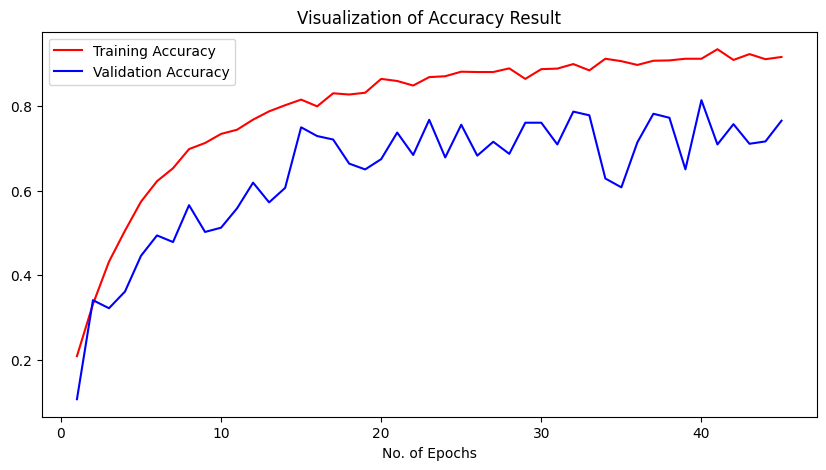

Found 3770 files belonging to 37 classes.
Test Classes: ['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotte

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.00      0.00      0.00       126
                                 Apple___Black_rot       0.03      1.00      0.07       125
                          Apple___Cedar_apple_rust       0.00      0.00      0.00        55
                                   Apple___healthy       0.00      0.00      0.00       109
                               Blueberry___healthy       0.00      0.00      0.00       100
          Cherry_(including_sour)___Powdery_mildew       0.00      0.00      0.00       100
                 Cherry_(including_sour)___healthy       0.00      0.00      0.00       102
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.00      0.00      0.00       103
                       Corn_(maize)___Common_rust_       0.00      0.00      0.00       109
               Corn_(maize)___Northern_Leaf_Blight       0.00      0.00      0.

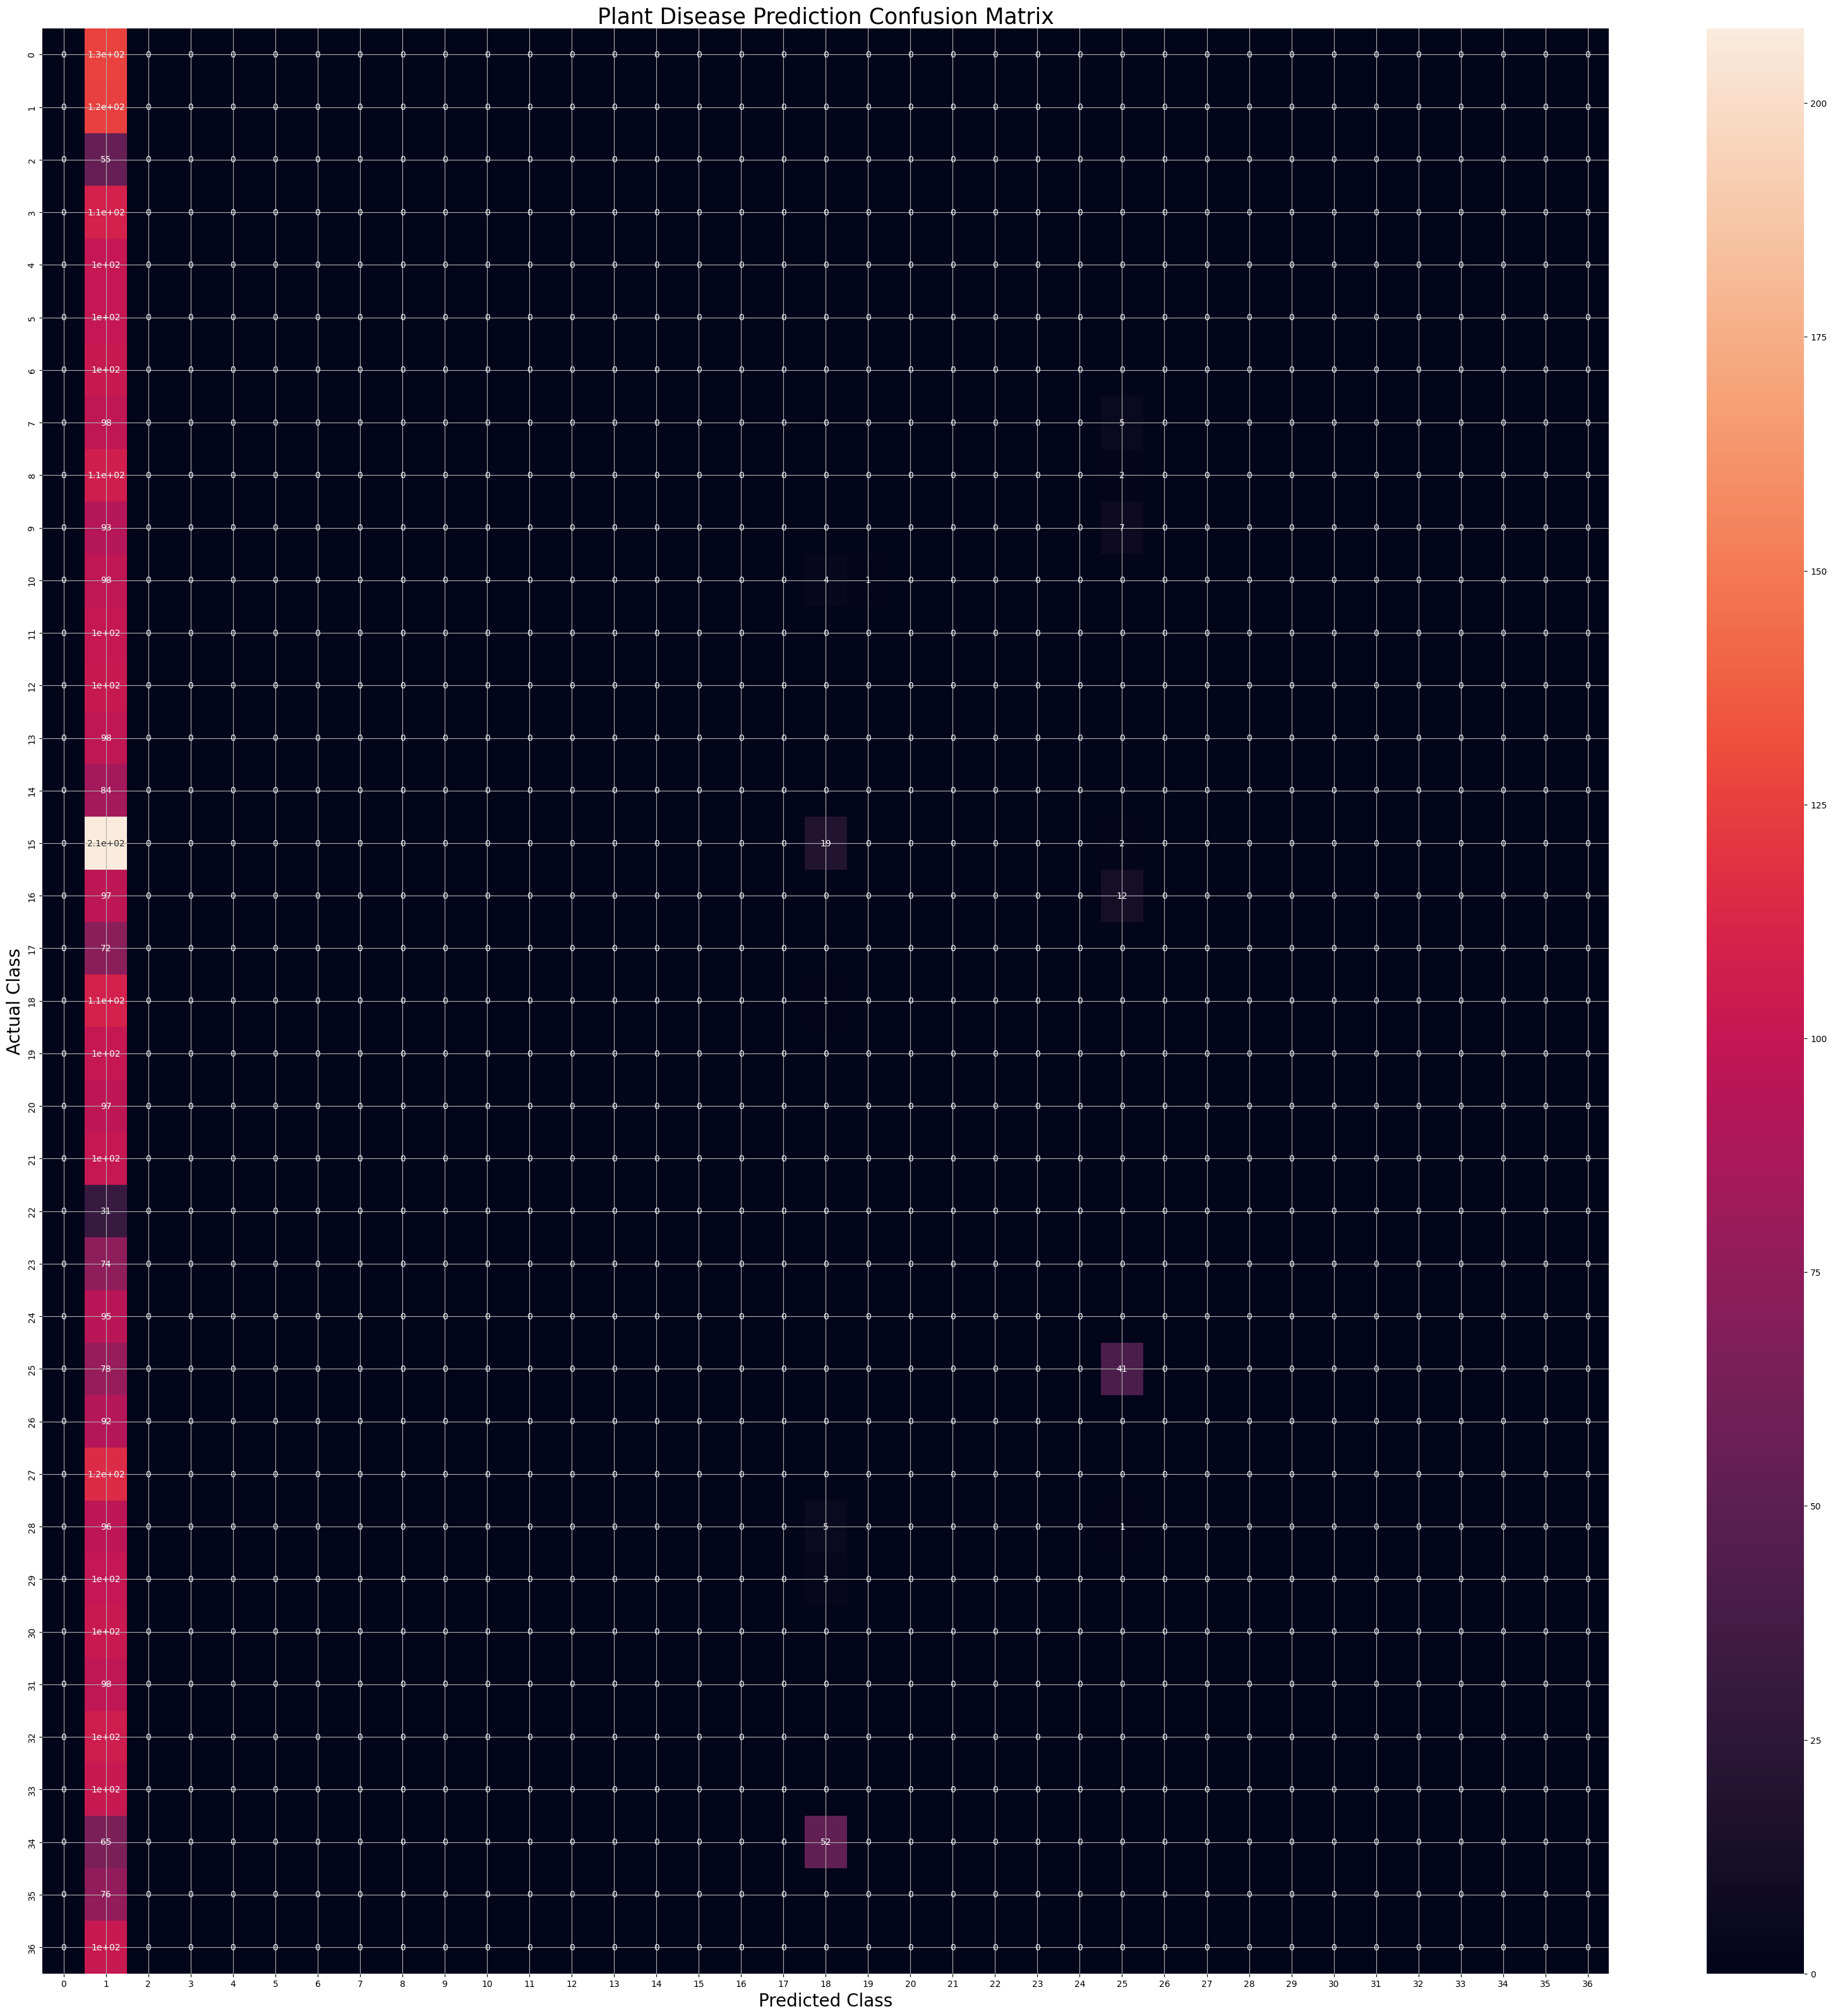

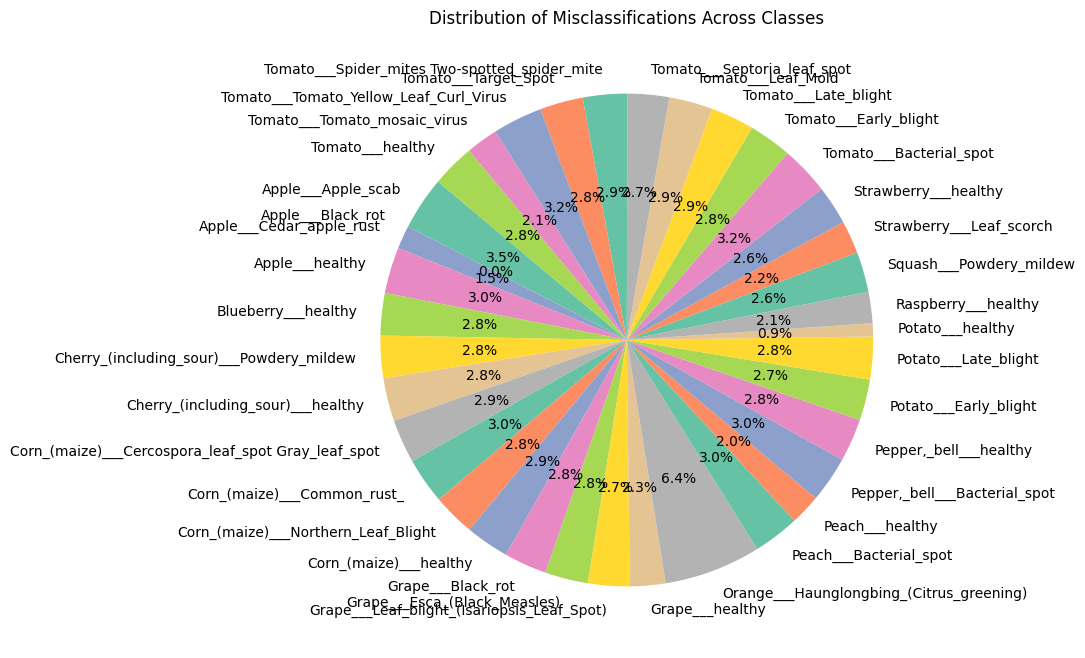

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os

# Data Augmentation & Normalization
from tensorflow.keras.layers import RandomFlip, RandomRotation, RandomZoom, Rescaling

data_augmentation = tf.keras.Sequential([
    RandomFlip("horizontal"),  # Flip images randomly
    RandomRotation(0.2),       # Rotate images randomly
    RandomZoom(0.2),           # Zoom randomly
])



normalization_layer = Rescaling(1./255)  # Normalize pixels to range [0,1]

# Load training dataset from directory
train_dataset = tf.keras.utils.image_dataset_from_directory(
    "/content/drive/MyDrive/train",
    labels="inferred",
    label_mode="categorical",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True
)

# Load validation dataset from directory
valid_dataset = tf.keras.utils.image_dataset_from_directory(
    "/content/drive/MyDrive/val",
    labels="inferred",
    label_mode="categorical",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False
)

# Print class names for both training and validation sets
print("Training Set Classes:", train_dataset.class_names)

# Apply data augmentation & normalization to the training dataset
train_dataset = train_dataset.map(lambda x, y: (data_augmentation(normalization_layer(x)), y))
valid_dataset = valid_dataset.map(lambda x, y: (normalization_layer(x), y))

# Define CNN model
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization, LeakyReLU
from tensorflow.keras.models import Sequential

cnn = Sequential()

cnn.add(Conv2D(filters=32, kernel_size=3, padding='same', kernel_initializer='he_normal', input_shape=[128, 128, 3]))
cnn.add(BatchNormalization())
cnn.add(LeakyReLU())
cnn.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(MaxPool2D(pool_size=2, strides=2))

cnn.add(Conv2D(filters=64, kernel_size=3, padding='same', kernel_initializer='he_normal'))
cnn.add(BatchNormalization())
cnn.add(LeakyReLU())
cnn.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
cnn.add(MaxPool2D(pool_size=2, strides=2))

cnn.add(Conv2D(filters=128, kernel_size=3, padding='same', kernel_initializer='he_normal'))
cnn.add(BatchNormalization())
cnn.add(LeakyReLU())
cnn.add(Conv2D(filters=128, kernel_size=3, activation='relu'))
cnn.add(MaxPool2D(pool_size=2, strides=2))

cnn.add(Conv2D(filters=256, kernel_size=3, padding='same', kernel_initializer='he_normal'))
cnn.add(BatchNormalization())
cnn.add(LeakyReLU())
cnn.add(Conv2D(filters=256, kernel_size=3, activation='relu'))
cnn.add(Dropout(0.2))
cnn.add(MaxPool2D(pool_size=2, strides=2))

cnn.add(Conv2D(filters=512, kernel_size=3, padding='same', kernel_initializer='he_normal'))
cnn.add(BatchNormalization())
cnn.add(LeakyReLU())
cnn.add(Conv2D(filters=512, kernel_size=3, activation='relu'))
cnn.add(Dropout(0.3))
cnn.add(MaxPool2D(pool_size=2, strides=2))

cnn.add(Dropout(0.25))
cnn.add(Flatten())
cnn.add(Dense(units=1200, kernel_initializer='he_normal'))
cnn.add(BatchNormalization())
cnn.add(LeakyReLU())
cnn.add(Dropout(0.4))  # To avoid overfitting

# Output Layer
cnn.add(Dense(units=37, activation='softmax'))  # Adjust for number of classes in your dataset

# Compile the model
cnn.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
            loss='categorical_crossentropy',
            metrics=['accuracy'])

# Train the model
training_history = cnn.fit(train_dataset, validation_data=valid_dataset, epochs=45)

# Evaluate the model on training set
train_loss, train_acc = cnn.evaluate(train_dataset)
print('Training accuracy:', train_acc)

# Evaluate the model on validation set
val_loss, val_acc = cnn.evaluate(valid_dataset)
print('Validation accuracy:', val_acc)


# Save the trained model
cnn.save('trained_plant_disease_model.keras')

# Plot accuracy results
epochs = range(1, len(training_history.history['accuracy']) + 1)
plt.figure(figsize=(10, 5))
plt.plot(epochs, training_history.history['accuracy'], color='red', label='Training Accuracy')
plt.plot(epochs, training_history.history['val_accuracy'], color='blue', label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

# Load test dataset
test_set = tf.keras.utils.image_dataset_from_directory(
    "/content/drive/MyDrive/val",  # Adjust this path if necessary
    labels="inferred",
    label_mode="categorical",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False
)

# Get class names
class_names = test_set.class_names
print("Test Classes:", class_names)

# Make predictions
y_pred = cnn.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

# Get true labels
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

# Evaluate model using a confusion matrix
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(Y_true, predicted_categories)
print(classification_report(Y_true, predicted_categories, target_names=class_names))

# Plot confusion matrix
# plt.figure(figsize=(10, 8))
# sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
# plt.xlabel('Predicted Class')
# plt.ylabel('Actual Class')
# plt.title('Plant Disease Prediction Confusion Matrix')
# plt.grid(True)
# plt.show()

plt.figure(figsize=(40, 40))

sns.heatmap(cm,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 25)
plt.grid(True)
plt.show()

# Compute misclassified instances per class
misclassified_counts = cm.sum(axis=1) - np.diag(cm)

# Plot a pie chart for misclassified instances
plt.figure(figsize=(8, 8))
plt.pie(misclassified_counts, labels=class_names, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Set2"))
plt.title('Distribution of Misclassifications Across Classes')
plt.show()
